<a href="https://colab.research.google.com/github/Rahul-Malayil/Entri_Elevate_Project/blob/main/ELECTRICANDPLUGINMOTORVEHICLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Electric Vehicle Type Prediction (Plug In Vs EV)





DATASET:https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/data_preview

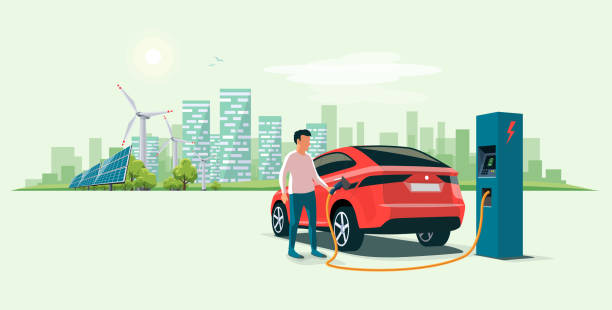

               INTRODUCTION

Introduction

As the automotive industry transitions toward sustainable and eco-friendly solutions, electric vehicles (EVs) have gained significant attention. Among the various types of EVs, Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) are the most commonly discussed. BEVs are fully electric, relying solely on batteries for propulsion, while PHEVs combine a conventional internal combustion engine with an electric motor, offering both battery and gasoline-powered driving options.
With the growing variety of EVs in the market, accurately predicting whether a vehicle is a BEV or PHEV based on its features is essential. This prediction can benefit manufacturers, consumers, and policymakers in making informed decisions, optimizing production, and supporting the infrastructure needed for EV adoption.

#Objective


The primary objective of this project is to build a predictive model that classifies electric vehicles into Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). The model will use various vehicle parameters, such as battery capacity, range, fuel type, and other specifications, to make this classification.


#Goal


The goal of this project is to:

1. Develop a robust machine learning model capable of accurately predicting the type of EV based on input data.

2. Provide insights into the key factors influencing the classification between BEVs and PHEVs.

3. Support decision-making for consumers in selecting the right EV, for manufacturers to target production more effectively, and for policymakers to design infrastructure that meets the needs of different EV types.
By achieving these objectives, the project aims to contribute to the efficient adoption and implementation of electric vehicles across various sectors.











Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


Display data

In [4]:
data=pd.read_csv("/content/Electric_Vehicle_Population_Data_20241011.csv")
data


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171629,3FMTK3SSXP,Pierce,South Hill,WA,98373.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,261263943.0,POINT (-122.321505 47.1435291),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
171630,5UXTA6C02N,Snohomish,Mill Creek,WA,98012.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,44.0,269731808.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306104e+10
171631,1G1FZ6S06N,King,Seattle,WA,98115.0,2022,CHEVROLET,BOLT EUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,240457878.0,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
171632,1N4AZ1BP5L,Whatcom,Bellingham,WA,98226.0,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149.0,0.0,42.0,133748464.0,POINT (-122.464218 48.79135),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [5]:
data.shape

(171634, 17)

Display the information about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171634 entries, 0 to 171633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         171634 non-null  object 
 1   County                                             171633 non-null  object 
 2   City                                               171633 non-null  object 
 3   State                                              171634 non-null  object 
 4   Postal Code                                        171633 non-null  float64
 5   Model Year                                         171634 non-null  int64  
 6   Make                                               171634 non-null  object 
 7   Model                                              171633 non-null  object 
 8   Electric Vehicle Type                              171634 non-null  object

In [ ]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In data description the 'electric range','base msrp','legislative dist', and 'dol vehicle id'  are different so we have to perform some procedures such as fillna,dropna,and remove outliers.

In [7]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,171633.000000,171634.000000,171625.000000,171625.000000,171459.000000,1.716330e+05,1.716320e+05
mean,98208.975984,2020.950791,52.625340,919.627793,29.538613,2.275397e+08,5.300948e+10
std,1619.995684,2.988458,88.308705,7787.401964,14.832787,7.258910e+07,1.087540e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98045.000000,2019.000000,0.000000,0.000000,18.000000,1.929908e+08,5.303301e+10
50%,98118.000000,2022.000000,0.000000,0.000000,34.000000,2.380299e+08,5.303303e+10
75%,98366.000000,2023.000000,53.000000,0.000000,43.000000,2.617984e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


Display the object data


In [ ]:
# Check for unique values in columns with object datatype
for col in data.describe(include = 'object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

VIN (1-10)
['5UXTA6C0XM' '5YJ3E1EB1J' 'WP0AD2A73G' ... 'WA1ACBGEXP' 'WAUBHBFW8R'
 'WAUFJBFW6N']
--------------------------------------------------
County
['Kitsap' 'Snohomish' 'King' 'Thurston' 'Yakima' 'Skagit' 'Chelan'
 'Stevens' 'Kittitas' 'Walla Walla' 'Island' 'Whitman' 'Spokane' 'Grant'
 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat' 'Pierce' 'Whatcom'
 'Grays Harbor' 'Lewis' 'Okanogan' 'Pacific' 'Franklin' 'Skamania'
 'Pend Oreille' 'Mason' 'Benton' 'San Juan' 'Adams' 'Douglas' 'Macomb'
 'Lincoln' 'Asotin' 'Wahkiakum' 'Polk' 'San Diego' 'Leavenworth'
 'Stafford' 'Sonoma' 'Columbia' 'Oldham' 'Orange' 'District of Columbia'
 'Lee' 'Ferry' 'Goochland' 'York' 'Doña Ana' 'Lake' 'New London' 'Kings'
 'Platte' 'Collin' 'Anne Arundel' 'Burlington' 'Pettis' 'Cumberland'
 'Hamilton' 'Los Angeles' 'Howard' 'Kauai' 'Rockingham' 'Solano'
 'Charleston' nan 'Tippecanoe' 'Montgomery' 'New Haven' 'Suffolk'
 'Charles' "Prince George's" 'Contra Costa' 'Norfolk' 'Hillsborough'
 'Wake' 'Carroll

<Figure size 1600x1200 with 0 Axes>

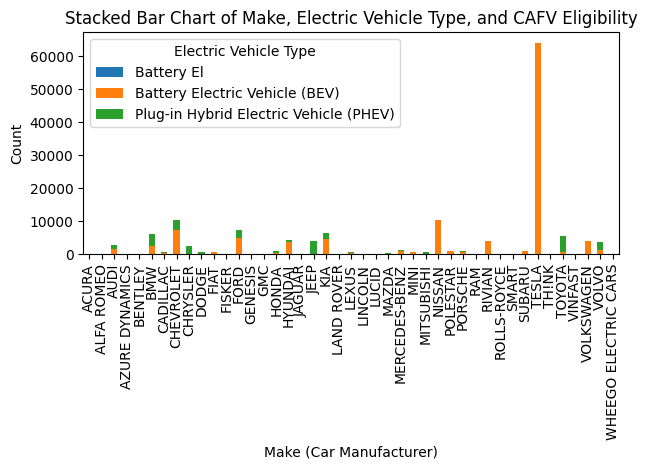

In [ ]:
plt.figure(figsize=(16, 12))
data.groupby(['Make', 'Electric Vehicle Type'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].size().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.title('Stacked Bar Chart of Make, Electric Vehicle Type, and CAFV Eligibility')
plt.xlabel('Make (Car Manufacturer)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
#countplot

Missing values checking


In [ ]:
data.isnull().sum()/len(data)*100

,0
VIN (1-10),0.000000
County,0.000683
City,0.000683
State,0.000000
Postal Code,0.000683
Model Year,0.000000
Make,0.000000
Model,0.000000
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000683


In [ ]:
data.drop(['VIN (1-10)','State','Postal Code'],axis=1,inplace=True)

Drop null values

In [ ]:
data.dropna(inplace = True)

Split the data into categoric

In [8]:
categorical = data.select_dtypes(include=['object']).columns
categorical

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
data[categorical]

,County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,Kitsap,Seabeck,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC
1,Kitsap,Poulsbo,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC
2,Snohomish,Bothell,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC
3,Kitsap,Bremerton,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC
4,King,Redmond,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...
146339,King,Seattle,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.3173531 47.5484673),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
146340,Walla Walla,College Place,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-118.3885398 46.0448318),PACIFICORP
146341,Spokane,Spokane,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-117.402924 47.63041),MODERN ELECTRIC WATER COMPANY
146342,Spokane,Spokane Valley,AUDI,E-TRON GT,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-117.193798 47.646855),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...


Fill the categoric data with median

In [9]:
# Import the necessary class
from sklearn.impute import SimpleImputer

# Impute missing categorical values with the mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical] = imputer_categorical.fit_transform(data[categorical])

Split the data into numeric

In [10]:
numeric= data.select_dtypes(include=['number']).columns
numeric

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

In [11]:
# Import the necessary class
from sklearn.impute import SimpleImputer

# Impute missing numeric values with the median
imputer_numeric = SimpleImputer(strategy='median')  # Use 'median' strategy
data[numeric] = imputer_numeric.fit_transform(data[numeric])  # Apply to numeric columns
data[numeric].isnull().sum()

,0
Postal Code,0
Model Year,0
Electric Range,0
Base MSRP,0
Legislative District,0
DOL Vehicle ID,0
2020 Census Tract,0



Pie Chart

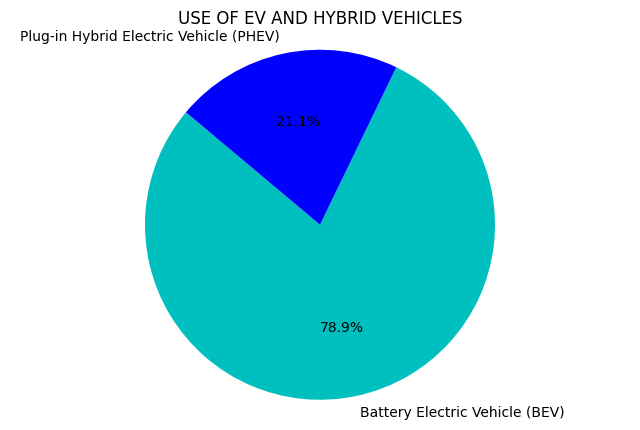

In [ ]:
# Let us plot two types of EVs in seperate pie charts.
# Plot Battery Electric Vehicles (BEV)
plt.figure(figsize=(8, 5))

# Get the value counts for 'Electric Vehicle Type'
ev_type_counts = data['Electric Vehicle Type'].value_counts()

# Plot the pie chart using the value counts
plt.pie(ev_type_counts,autopct='%1.1f%%', startangle=140, colors=['c','b'], labels=ev_type_counts.index)

plt.title('USE OF EV AND HYBRID VEHICLES') # Consider changing the title to reflect the data being plotted
plt.axis('equal')
# plt.legend(data['make']) # Remove or adjust legend if necessary
plt.show()

Companies with percentage of production of BEV and PHEV

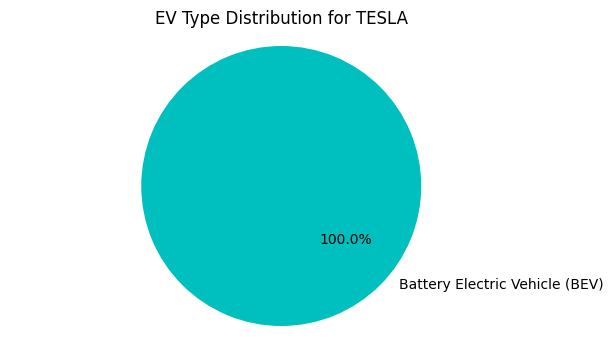

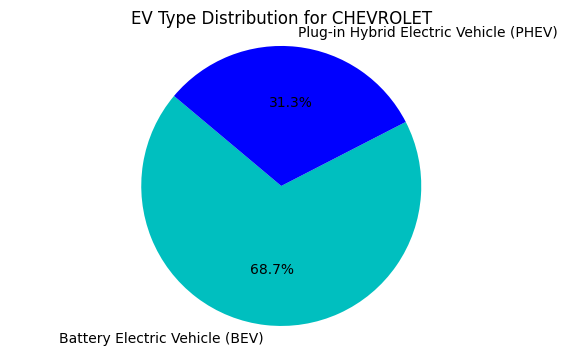

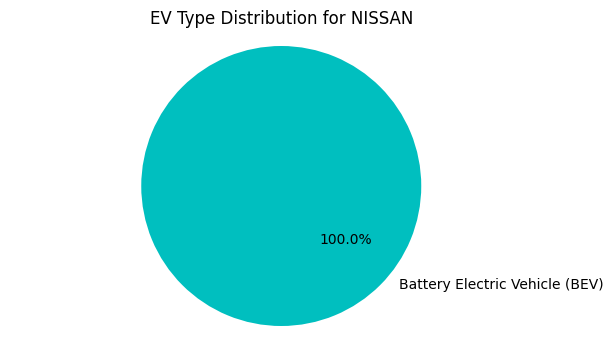

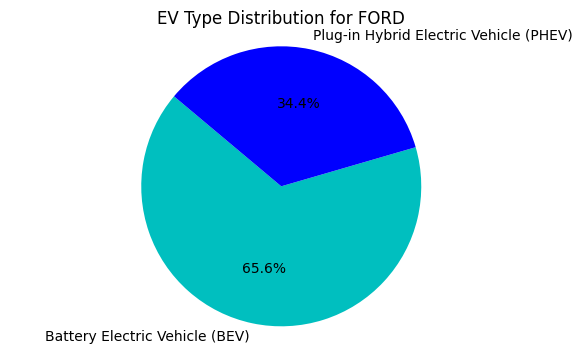

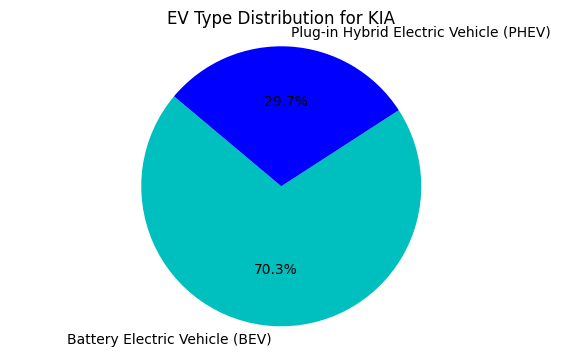

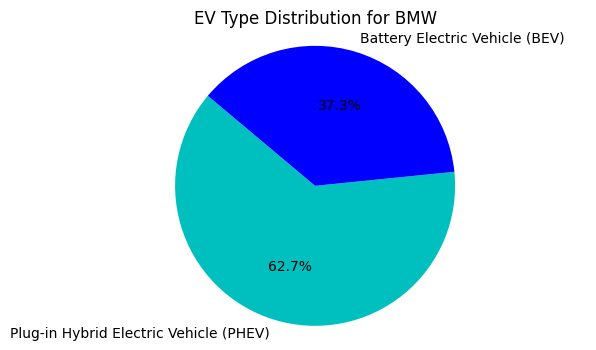

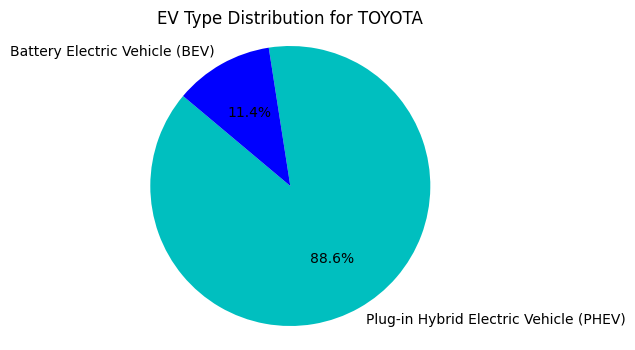

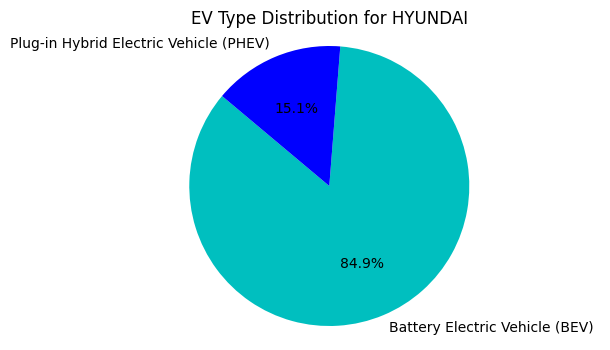

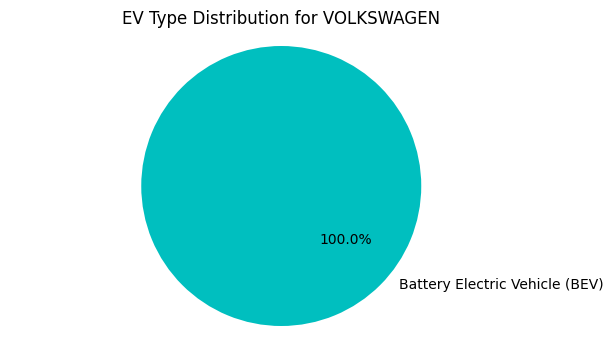

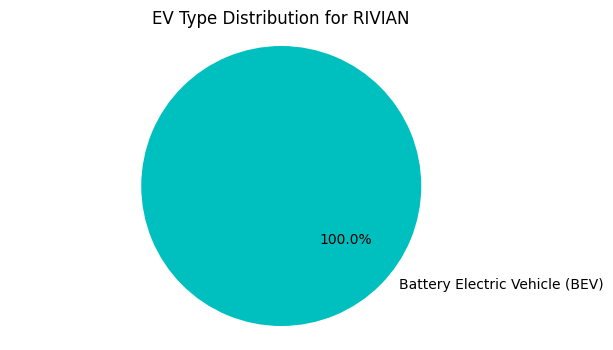

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_companies = data['Make'].value_counts().nlargest(10).index  # Assuming 'df' is your DataFrame

for company in top_10_companies:
    company_data = data[data['Make'] == company]
    ev_type_counts = company_data['Electric Vehicle Type'].value_counts()

    # Create pie chart
    plt.figure(figsize=(7, 4))
    plt.pie(ev_type_counts,
            labels=ev_type_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=['c', 'b'])
    plt.title(f'EV Type Distribution for {company}')
    plt.axis('equal')
    plt.show()

In [ ]:
data[numeric]

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,2021,30.0,0.0,35.0,267929112.0,5.303509e+10
1,2018,215.0,0.0,23.0,475911439.0,5.303509e+10
2,2016,15.0,0.0,1.0,101971278.0,5.306105e+10
3,2018,215.0,0.0,23.0,474363746.0,5.303508e+10
4,2019,150.0,0.0,45.0,476346482.0,5.303303e+10
...,...,...,...,...,...,...
146339,2023,0.0,0.0,37.0,240727903.0,5.303301e+10
146340,2019,220.0,0.0,16.0,271721523.0,5.307192e+10
146341,2024,26.0,0.0,6.0,265762927.0,5.306300e+10
146342,2022,0.0,0.0,4.0,195344110.0,5.306301e+10


Skewness of Numeric datatype

In [ ]:
data[numeric].skew()

,0
Model Year,-1.239329
Electric Range,1.691365
Base MSRP,16.969784
Legislative District,-0.528070
DOL Vehicle ID,0.262292
2020 Census Tract,0.527626


Box plot and Histogram for outlier checking

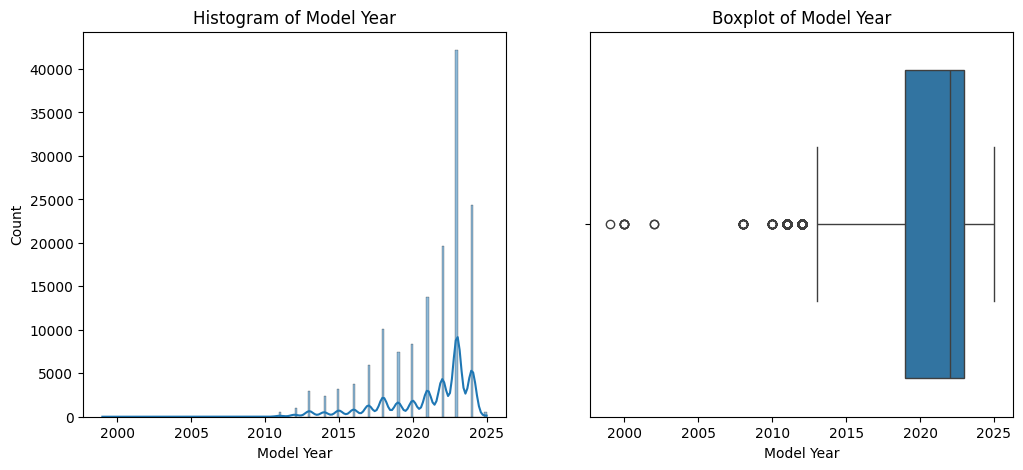

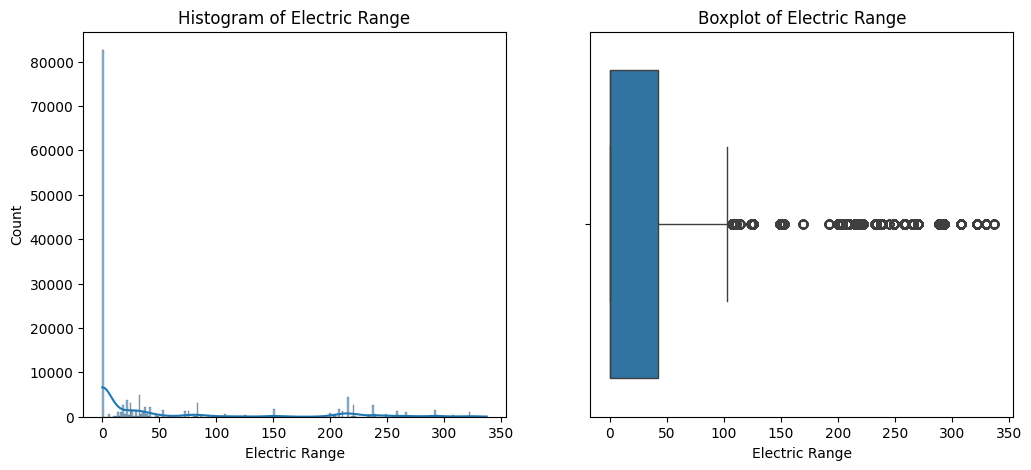

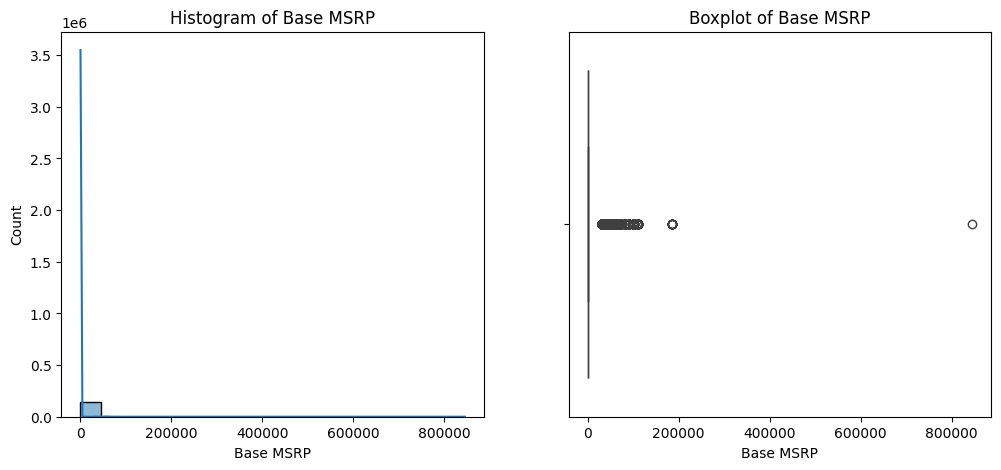

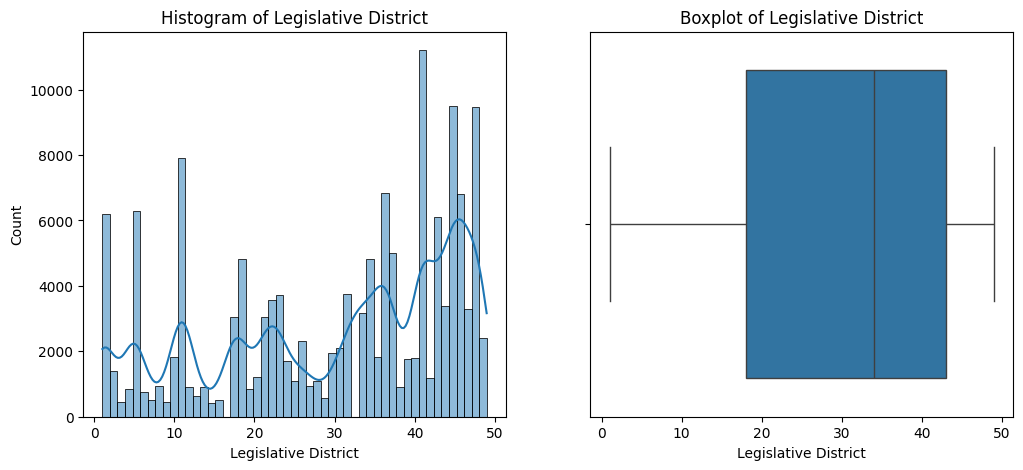

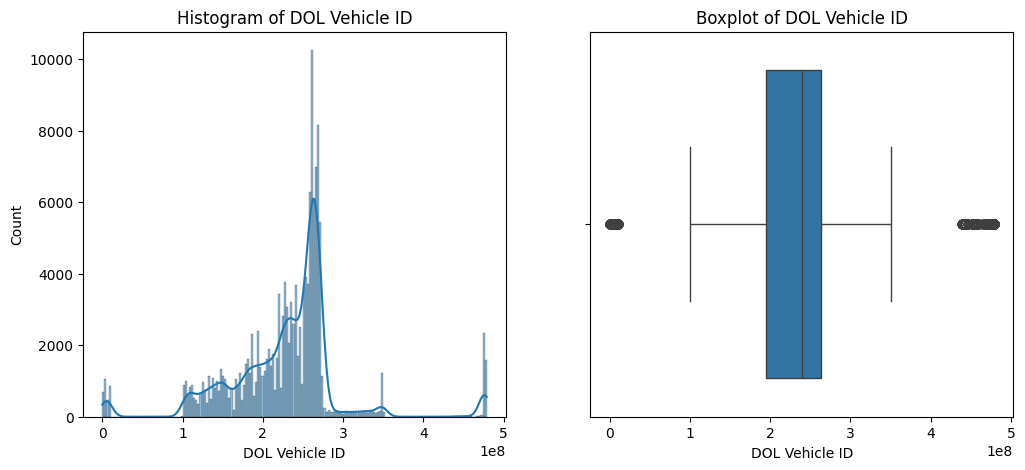

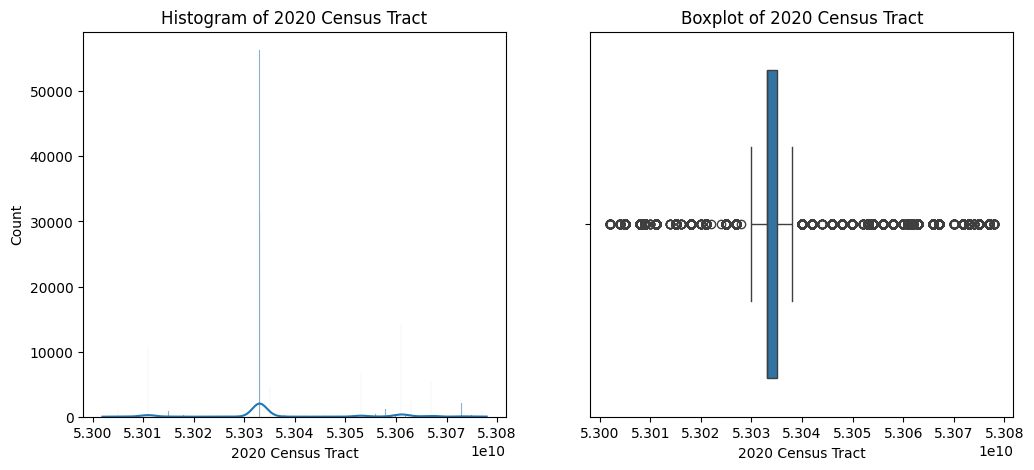

In [ ]:
for column in numeric:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

Performing inter quartile range (IQR) method to remove outliers

In [12]:
Q1 = data[numeric].quantile(0.25)
Q3 = data[numeric].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data[numeric] < lower_bound) | (data[numeric] > upper_bound)

# Remove rows with outliers
data1 = data[~outliers.any(axis=1)]


data1


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
6,KM8S6DA23N,Kitsap,Poulsbo,WA,98370.0,2022.0,HYUNDAI,SANTA FE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,31.0,0.0,23.0,212217764.0,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
7,7FCTGAAA1P,Snohomish,Arlington,WA,98223.0,2023.0,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,252414039.0,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC,5.306105e+10
9,1N4AZ0CP2F,King,Kirkland,WA,98034.0,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,45.0,109765204.0,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171627,3FMTK4SXXP,Snohomish,Edmonds,WA,98020.0,2023.0,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,261329148.0,POINT (-122.3757836 47.800042),PUGET SOUND ENERGY INC,5.306105e+10
171629,3FMTK3SSXP,Pierce,South Hill,WA,98373.0,2023.0,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,261263943.0,POINT (-122.321505 47.1435291),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
171630,5UXTA6C02N,Snohomish,Mill Creek,WA,98012.0,2022.0,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,44.0,269731808.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306104e+10
171631,1G1FZ6S06N,King,Seattle,WA,98115.0,2022.0,CHEVROLET,BOLT EUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,240457878.0,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


Checking outliers after performing IQR method

In [13]:
data1[numeric].skew()

,0
Postal Code,1.227702
Model Year,-1.892444
Electric Range,2.294183
Base MSRP,0.000000
Legislative District,-0.592318
DOL Vehicle ID,-0.811133
2020 Census Tract,0.477678


  Displaying outliers after performing IQR method

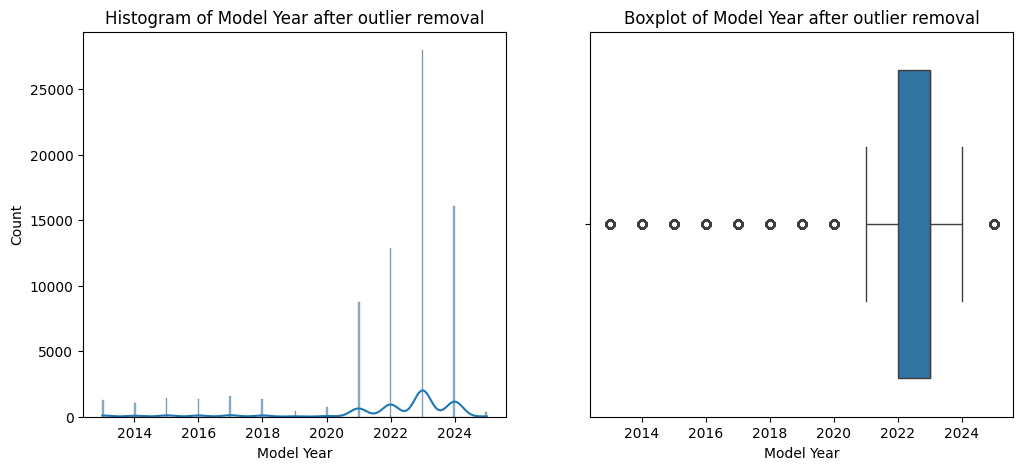

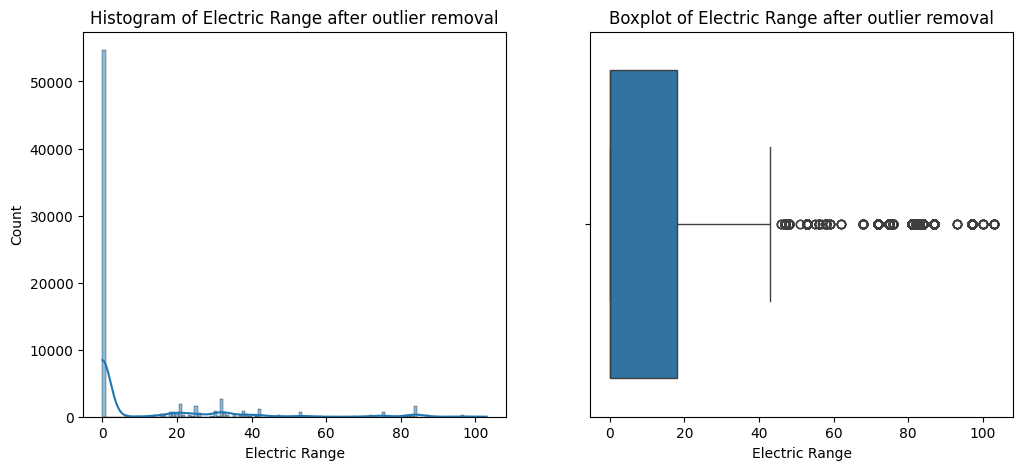

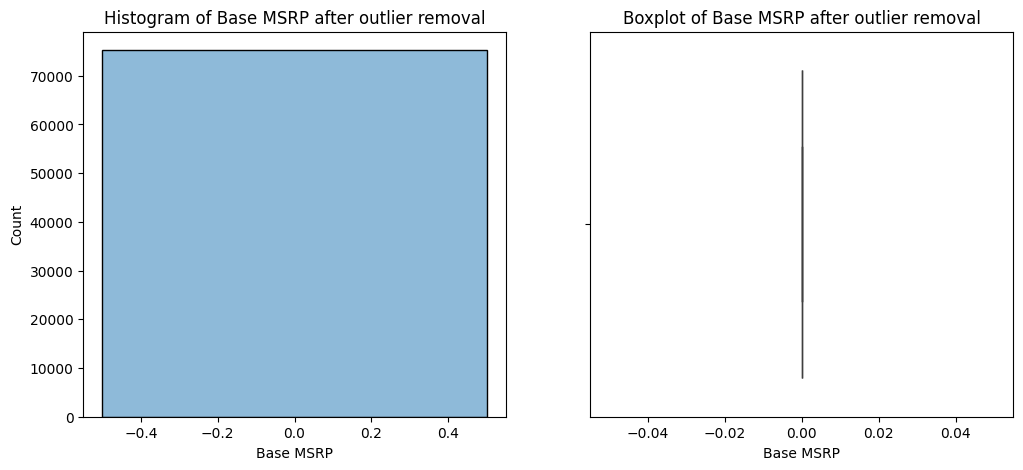

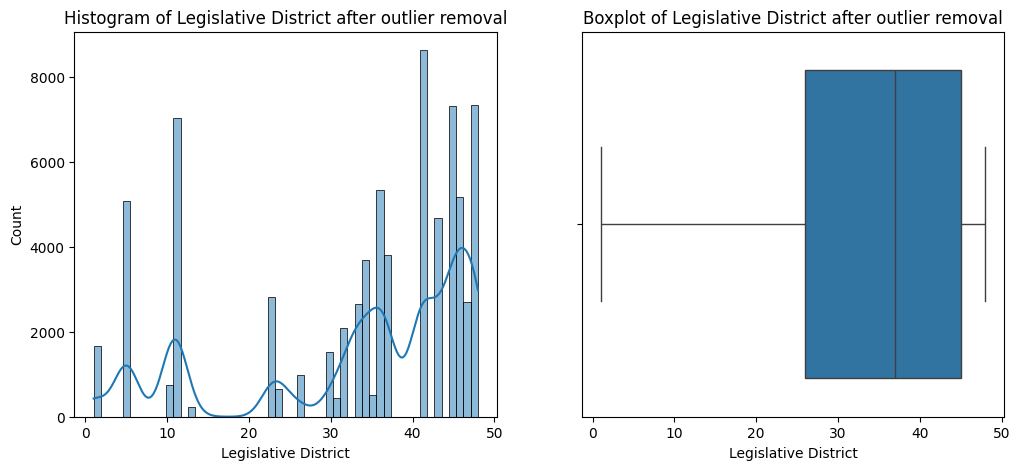

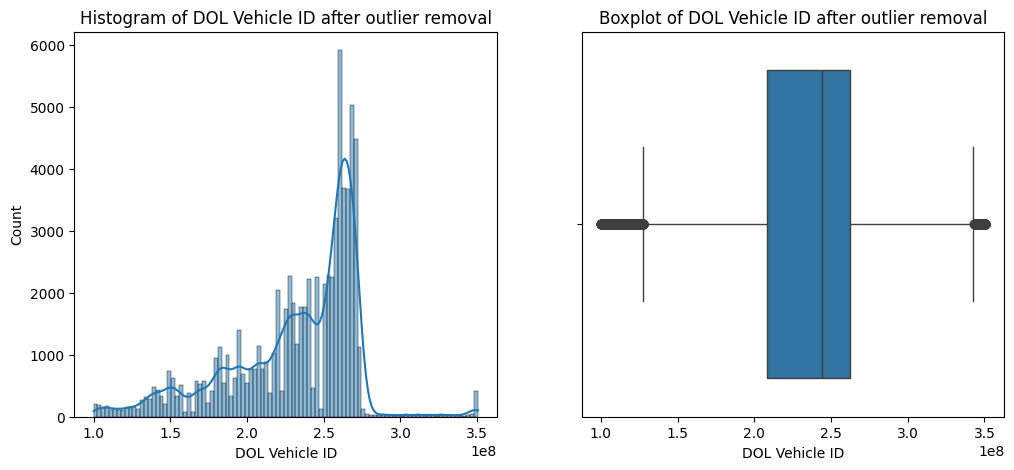

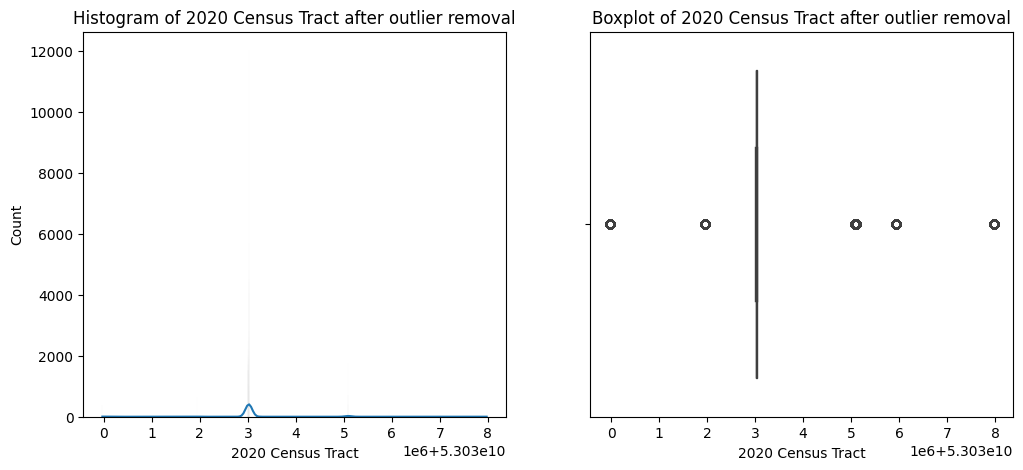

In [ ]:
for column in numeric:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data1[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data1[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

Applying log function to remove remaining skewness

In [14]:
import numpy as np

def apply_log_transform(data1, columns):
    """Applies a log transformation to the specified columns and returns the transformed data."""
    data11 = data1.copy() # Create a copy to avoid modifying the original DataFrame
    data11[columns] = np.log1p(data1[columns])  # Apply log1p to selected columns
    return data11

# Apply log transformation to numeric columns
data11 = apply_log_transform(data1, numeric)

# Calculate skewness of the transformed columns
skewness = data11[numeric].skew()


<ipython-input-16-a7adf1749f18>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')


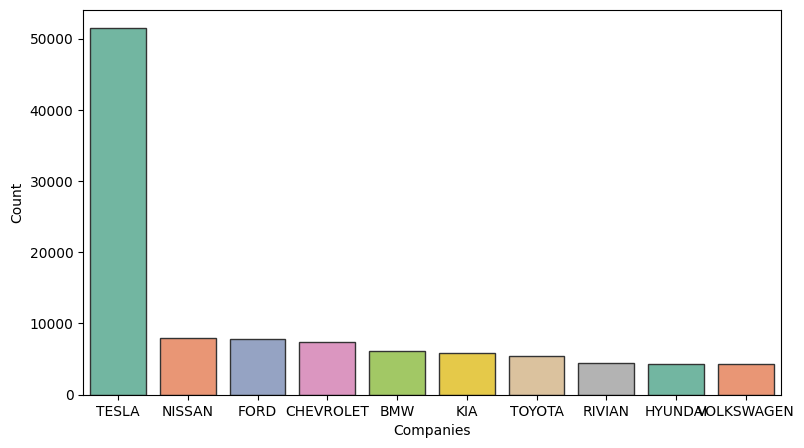

In [16]:
#lets see which company makes most of the electric vehicles
Companies = data1.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = data1.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

<ipython-input-17-33c271ca6faf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')


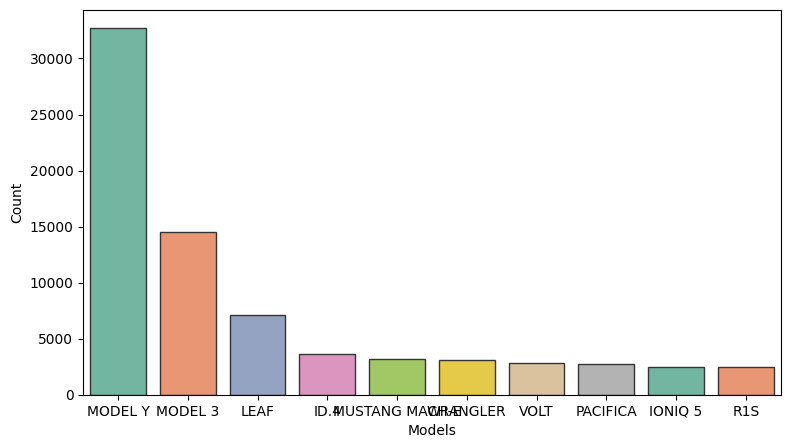

In [17]:
#Top 10 models in use

Models = data1.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = data1.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [ ]:
data11['Base MSRP'].value_counts()

,count
Base MSRP,
0.0,75268


In [ ]:
data11.drop('Base MSRP',axis=1,inplace=True)

In [ ]:
numeric= data11.select_dtypes(include=['number']).columns
numeric

Index(['Model Year', 'Electric Range', 'Legislative District',
       'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

Plot a correlation matrix

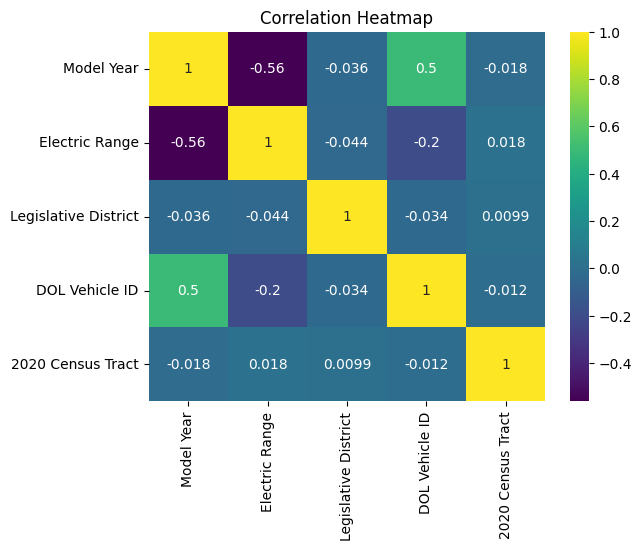

In [ ]:
# Compute the correlation matrix
corr_matrix = data11[numeric].corr()

# Generate a heatmap

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
electric_range_counts = data11['Electric Range'].value_counts()
print(electric_range_counts)

Electric Range
0.000000    54687
3.496508     2692
3.091042     1877
4.442651     1651
3.258097     1537
            ...  
3.610918        2
2.484907        2
3.951244        2
3.784190        1
4.060443        1
Name: count, Length: 62, dtype: int64


Fill the 'electric range' data with median

In [ ]:
data11['Electric Range'] = data11['Electric Range'].fillna(data11['Electric Range'].median())

In [ ]:
data11

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,Kitsap,Seabeck,7.611842,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.433987,3.583519,19.406233,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,24.694220
7,King,Seattle,7.611842,BMW,X3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,2.890372,3.610918,18.723205,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),24.694180
8,King,Bellevue,7.608871,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,4.442651,3.891820,18.474314,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
12,Kitsap,Poulsbo,7.613325,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.761200,3.178054,19.420772,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,24.694220
20,Kitsap,Bainbridge Island,7.609367,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,2.833213,3.178054,18.815310,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,24.694220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146331,King,Redmond,7.613325,GMC,HUMMER EV SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,3.828641,19.368206,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
146335,King,Issaquah,7.612831,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,1.791759,19.377321,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
146336,Kitsap,Seabeck,7.611842,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,3.583519,18.876044,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,24.694220
146338,King,Bellevue,7.611842,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,3.737670,19.206844,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181


In [ ]:
data11[categorical]

,County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,Kitsap,Seabeck,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC
7,King,Seattle,BMW,X3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
8,King,Bellevue,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
12,Kitsap,Poulsbo,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC
20,Kitsap,Bainbridge Island,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...
146331,King,Redmond,GMC,HUMMER EV SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
146335,King,Issaquah,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
146336,Kitsap,Seabeck,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC
146338,King,Bellevue,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


Encoding data using Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


data11['Electric Vehicle Type'] = le.fit_transform(data11['Electric Vehicle Type'])
data11


,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,Kitsap,Seabeck,7.611842,BMW,X5,1,Clean Alternative Fuel Vehicle Eligible,3.433987,3.583519,19.406233,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,24.694220
7,King,Seattle,7.611842,BMW,X3,1,Not eligible due to low battery range,2.890372,3.610918,18.723205,POINT (-122.38591 47.67597),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),24.694180
8,King,Bellevue,7.608871,NISSAN,LEAF,0,Clean Alternative Fuel Vehicle Eligible,4.442651,3.891820,18.474314,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
12,Kitsap,Poulsbo,7.613325,TOYOTA,RAV4 PRIME,1,Clean Alternative Fuel Vehicle Eligible,3.761200,3.178054,19.420772,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,24.694220
20,Kitsap,Bainbridge Island,7.609367,AUDI,A3,1,Not eligible due to low battery range,2.833213,3.178054,18.815310,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,24.694220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146331,King,Redmond,7.613325,GMC,HUMMER EV SUV,0,Eligibility unknown as battery range has not b...,0.000000,3.828641,19.368206,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
146335,King,Issaquah,7.612831,TESLA,MODEL Y,0,Eligibility unknown as battery range has not b...,0.000000,1.791759,19.377321,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181
146336,Kitsap,Seabeck,7.611842,TESLA,MODEL 3,0,Eligibility unknown as battery range has not b...,0.000000,3.583519,18.876044,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,24.694220
146338,King,Bellevue,7.611842,TESLA,MODEL 3,0,Eligibility unknown as battery range has not b...,0.000000,3.737670,19.206844,POINT (-122.1436732 47.6157551),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),24.694181


In [ ]:
data11['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
0,57901
1,17367


Random sampling to balance o and 1

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data11[data11['Electric Vehicle Type'] == 0]
df_minority = data11[data11['Electric Vehicle Type'] == 1]

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
data12 = pd.concat([df_majority, df_minority_upsampled])

After random sampling

In [ ]:
data12['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
0,57901
1,57901


In [ ]:
data12[categorical].columns

Index(['County', 'City', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

Performing onehot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Replace 'sparse' with 'sparse_output'
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' to avoid errors with unseen values during prediction


# Fit and transform the categorical columns
encoded_data = ohe.fit_transform(data12[['County', 'City', 'Make','Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility']])

# Get feature names from the encoder
feature_names = ohe.get_feature_names_out(['County', 'City', 'Make','Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility'])

# Create a new DataFrame with the encoded data and feature names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=data12.index)

# Drop the original categorical columns from data12
data12 = data12.drop(['County', 'City', 'Make','Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility'], axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
data12 = pd.concat([data12, encoded_df], axis=1)

In [ ]:
data12

,Model Year,Electric Vehicle Type,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract,County_Island,County_Jefferson,County_King,County_Kitsap,...,Electric Utility_BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KITTITAS COUNTY,Electric Utility_BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY,Electric Utility_BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY,Electric Utility_CITY OF SEATTLE - (WA),Electric Utility_CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Electric Utility_CITY OF TACOMA - (WA),Electric Utility_CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP,Electric Utility_NO KNOWN ELECTRIC UTILITY SERVICE,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
8,7.608871,0,4.442651,3.891820,18.474314,24.694181,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,7.608871,0,4.406719,3.295837,19.026202,24.694219,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48,7.609862,0,4.615121,3.850148,19.674479,24.694180,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51,7.608871,0,4.406719,3.610918,18.934350,24.694180,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52,7.608871,0,4.442651,3.610918,19.152901,24.694180,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161,7.610853,1,3.871201,3.871201,19.386987,24.694181,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145306,7.611348,1,2.944439,3.784190,18.562327,24.694180,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124401,7.607878,1,3.663562,3.526361,18.531024,24.694181,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58396,7.613325,1,3.526361,3.218876,19.366449,24.694160,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting data into x and y

In [ ]:
x=data12.drop('Electric Vehicle Type',axis=1)
y=data12['Electric Vehicle Type']

Standardizing the x value

Performing dimensionality reduction method to reduce the columns

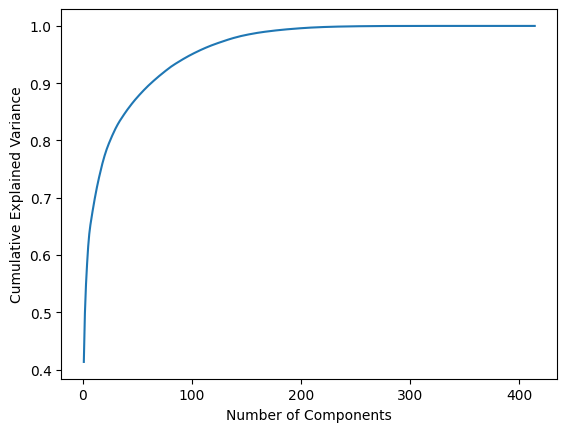

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Reducing columns using PCA

In [ ]:
pca=PCA(n_components=11)
x_pca=pca.fit_transform(x_scaled)

pca_df=pd.DataFrame(x_pca)
pca_df


,0,1,2,3,4,5,6,7,8,9,10
0,-0.327232,-1.782341,0.349212,-0.333721,-0.402556,-0.528619,-3.689844,-1.083981,-0.548253,0.943815,0.352260
1,-8.846394,1.130893,-0.612571,-1.399320,0.086071,-2.195587,-1.745576,-1.250854,-0.513409,1.063289,0.446225
2,-0.848596,-2.484802,2.751011,-1.364508,0.121805,0.129910,-0.299563,-0.297590,-0.033090,-0.782316,0.027320
3,-0.969056,-3.028250,3.009532,-1.615782,-0.085823,0.050023,-1.148010,-1.276713,-0.513481,0.465271,0.181072
4,-0.930932,-2.541449,3.146962,-1.339890,-0.032513,0.096556,-0.482847,-1.544739,-0.645579,-0.388610,0.002708
...,...,...,...,...,...,...,...,...,...,...,...
115797,0.010023,-1.854185,-0.414548,-0.305152,-0.317014,-0.357623,-2.683197,-1.733251,-0.770949,0.176514,0.166182
115798,-0.619078,-2.109383,3.133768,-1.574729,0.121249,0.158437,0.210543,1.442223,0.521680,0.449591,-0.121155
115799,-0.793839,-3.003756,-1.050536,-0.303689,-0.252697,-0.101131,-1.357469,-1.521437,-0.171026,0.083894,0.174928
115800,-4.047831,-3.600736,3.745957,16.483198,-9.227450,-0.014158,2.180102,-0.013953,-2.976487,0.805311,0.397084


Importing classification libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

performing train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

Predict on training data

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Applying Logistic regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_predictions = log_reg.predict(x_test)
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Classification Report:\n", classification_report(y_test, log_reg_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_predictions))

Logistic Regression Evaluation:
Accuracy: 0.9626527352014161
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     11732
           1       0.93      1.00      0.96     11429

    accuracy                           0.96     23161
   macro avg       0.96      0.96      0.96     23161
weighted avg       0.96      0.96      0.96     23161

Confusion Matrix:
 [[10918   814]
 [   51 11378]]


# Support Vector Machine (SVM)


In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

SVM Evaluation:
Accuracy: 0.9904580976641768
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     11732
           1       0.99      1.00      0.99     11429

    accuracy                           0.99     23161
   macro avg       0.99      0.99      0.99     23161
weighted avg       0.99      0.99      0.99     23161

Confusion Matrix:
 [[11562   170]
 [   51 11378]]


Decision tree

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))


Decision Tree Evaluation:
Accuracy: 0.9968049738785026
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11732
           1       0.99      1.00      1.00     11429

    accuracy                           1.00     23161
   macro avg       1.00      1.00      1.00     23161
weighted avg       1.00      1.00      1.00     23161

Confusion Matrix:
 [[11667    65]
 [    9 11420]]


Random forest

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest Evaluation:
Accuracy: 0.9973662622511982
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11732
           1       0.99      1.00      1.00     11429

    accuracy                           1.00     23161
   macro avg       1.00      1.00      1.00     23161
weighted avg       1.00      1.00      1.00     23161

Confusion Matrix:
 [[11673    59]
 [    2 11427]]


K nearest neighbour

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
print("K-Nearest Neighbors Evaluation:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))


K-Nearest Neighbors Evaluation:
Accuracy: 0.9964595656491516
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11732
           1       0.99      1.00      1.00     11429

    accuracy                           1.00     23161
   macro avg       1.00      1.00      1.00     23161
weighted avg       1.00      1.00      1.00     23161

Confusion Matrix:
 [[11668    64]
 [   18 11411]]


Displaying the accuracy,precision,recall,f1 score,confusion matrix of 5ML models

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize an empty list to store metrics for each model
results = []

# Define a function to evaluate the model and store the results
def evaluate_model(model_name, model, x_test, y_test):
    predictions = model.predict(x_test)

    # Append metrics to the results list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions, average='weighted'),
        "Recall": recall_score(y_test, predictions, average='weighted'),
        "F1 Score": f1_score(y_test, predictions, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, predictions)
    })

# Example models
# Assuming you've already trained and saved models like log_reg, svm_model, etc.
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "K-Nearest Neighbors": knn_model
}

# Evaluate each model and collect the metrics
for model_name, model in models.items():
    evaluate_model(model_name, model, x_test, y_test)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.962653,0.964699,0.962653,0.962628,"[[10918, 814], [51, 11378]]"
1,Random Forest,0.997366,0.997378,0.997366,0.997366,"[[11673, 59], [2, 11427]]"
2,Decision Tree,0.996805,0.996817,0.996805,0.996805,"[[11667, 65], [9, 11420]]"
3,K-Nearest Neighbors,0.996460,0.996468,0.996460,0.996460,"[[11668, 64], [18, 11411]]"


Applying hypertuning paramenter

In [ ]:
from sklearn.model_selection import GridSearchCV


Finding the best parameters of each models

Hypertuning and evaluating each classifier

In [ ]:
# Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(x_train, y_train)
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)


Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [10,20],
    'max_depth': [None, 5,10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(x_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}


In [ ]:
# Decision Tree
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(x_train, y_train)
print("Best parameters for Decision Tree:", dt_grid.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
knn_params = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='accuracy')
knn_grid.fit(x_train, y_train)
print("Best parameters for K-Nearest Neighbors:", knn_grid.best_params_)

Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


''''''


Evaluating the best model

In [ ]:
# Import libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize an empty list to store metrics for each tuned model
tuned_results = []

# Evaluate each tuned model function
def evaluate_tuned_model(model_name, tuned_model, x_test, y_test):
    predictions = tuned_model.predict(x_test)
    tuned_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions, average='weighted'),
        "Recall": recall_score(y_test, predictions, average='weighted'),
        "F1 Score": f1_score(y_test, predictions, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, predictions)
    })

# Assuming best estimators from GridSearchCV for each model
# Logistic Regression
tuned_log_reg = log_reg_grid.best_estimator_
evaluate_tuned_model("Tuned Logistic Regression", tuned_log_reg, x_test, y_test)

# Random Forest
tuned_rf_model = rf_grid.best_estimator_
evaluate_tuned_model("Tuned Random Forest", tuned_rf_model, x_test, y_test)

# Decision Tree
tuned_dt_model = dt_grid.best_estimator_
evaluate_tuned_model("Tuned Decision Tree", tuned_dt_model, x_test, y_test)

# K-Nearest Neighbors
tuned_knn_model = knn_grid.best_estimator_
evaluate_tuned_model("Tuned K-Nearest Neighbors", tuned_knn_model, x_test, y_test)

# Convert the results to a DataFrame
tuned_results_df = pd.DataFrame(tuned_results)

# Display the DataFrame
(tuned_results_df)


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Tuned Logistic Regression,0.963128,0.965257,0.963128,0.963102,"[[10916, 816], [38, 11391]]"
1,Tuned Random Forest,0.996978,0.996986,0.996978,0.996978,"[[11674, 58], [12, 11417]]"
2,Tuned Decision Tree,0.997280,0.997288,0.997280,0.997280,"[[11678, 54], [9, 11420]]"
3,Tuned K-Nearest Neighbors,0.997712,0.997721,0.997712,0.997712,"[[11681, 51], [2, 11427]]"


Choosing the model with the highest performance metrices

In [ ]:
# Find the model with the best accuracy
best_model_info = tuned_results_df.loc[tuned_results_df['Accuracy'].idxmax()]

best_model_info


,3
Model,Tuned K-Nearest Neighbors
Accuracy,0.997712
Precision,0.997721
Recall,0.997712
F1 Score,0.997712
Confusion Matrix,"[[11681, 51], [2, 11427]]"


Saving the best model

In [ ]:
# Extract model name and the best model
best_model_name = best_model_info['Model']

# Print the best model's details
print(f"Best Model: {best_model_name}")
print(f"Best Model Accuracy: {best_model_info['Accuracy']:.3f}")

Best Model: Tuned K-Nearest Neighbors
Best Model Accuracy: 0.998


In [ ]:
import pickle

# Assuming rf_model is your trained Random Forest model
filename = 'rf_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

Evaluating Unseen Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

# Step 1: Data Preparation Functions

# Log transformation for numeric columns
def apply_log_transform(data, columns):
    data = data.copy()
    data[columns] = np.log1p(data[columns])
    return data

# Step 2: Define Columns
numeric_cols = ['Electric Range']  # Replace with other numeric columns if needed
categorical_cols = ['County', 'City', 'Make', 'Model',
                    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                    'Vehicle Location', 'Electric Utility']

# Step 3: Initialize and Fit Preprocessing Pipeline on Training Data
# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', FunctionTransformer(apply_log_transform, kw_args={'columns': numeric_cols}), numeric_cols),  # Apply log transformation to numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # OneHotEncoder for categorical columns
    ],
    remainder='drop'
)

# Complete pipeline including log transformation, scaling, PCA, and model
preprocess_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4))  # Set n_components to a valid number (<= number of features)
])

# Sample training data preparation (assuming `data_train` is your training dataset)
# Replace this with actual training data
data_train = pd.DataFrame({
    'Electric Range': [100, 200, 150, 180],
    'County': ['King', 'Pierce', 'Snohomish', 'King'],
    'City': ['Seattle', 'Tacoma', 'Everett', 'Bellevue'],
    'Make': ['Tesla', 'Chevrolet', 'Ford', 'BMW'],
    'Model': ['Model S', 'Bolt EV', 'Mustang', 'X5'],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Eligible', 'Eligible', 'Not Eligible', 'Eligible'],
    'Vehicle Location': ['Location A', 'Location B', 'Location C', 'Location D'],
    'Electric Utility': ['PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC'],
    'Target': [0, 1, 1, 0]  # Target column for training
})

# Step 4: Train the Random Forest Model
X_train = data_train.drop(columns=['Target'])  # Drop target column
y_train = data_train['Target']  # Define target column

# Fit the preprocessing pipeline and transform the training data
X_train_prepared = preprocess_pipeline.fit_transform(X_train)

# Train the Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_prepared, y_train)

# Step 5: Save the Model and Pipeline
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('preprocess_pipeline.pkl', 'wb') as pipeline_file:
    pickle.dump(preprocess_pipeline, pipeline_file)

# Step 6: Load Model and Pipeline, Predict on Unseen Data
def load_model_and_pipeline():
    with open('rf_model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    with open('preprocess_pipeline.pkl', 'rb') as pipeline_file:
        loaded_pipeline = pickle.load(pipeline_file)
    return loaded_model, loaded_pipeline

# Step 7: Prepare Unseen Data and Make Predictions
def prepare_unseen_data(data, preprocess_pipeline):
    # Transform unseen data using the saved preprocessing pipeline
    prepared_data = preprocess_pipeline.transform(data)
    return prepared_data

# Load the model and pipeline
rf_model, preprocess_pipeline = load_model_and_pipeline()

# Example unseen data (replace with actual unseen data)
unseen_data = pd.DataFrame({
    'Electric Range': [120],
    'County': ['Kitsap'],
    'City': ['Seabeck'],
    'Make': ['BMW'],
    'Model': ['X5'],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Eligible'],
    'Vehicle Location': ['POINT (-122.8728334 47.5798304)'],
    'Electric Utility': ['PUGET SOUND ENERGY INC']
})

# Prepare and predict on unseen data
prepared_unseen_data = prepare_unseen_data(unseen_data, preprocess_pipeline)
predictions = rf_model.predict(prepared_unseen_data)

print("Predictions for unseen data:", predictions)


Predictions for unseen data: [1]


The rapid shift towards electric vehicles (EVs) as a sustainable alternative to conventional combustion-engine vehicles is a critical aspect of reducing global carbon emissions and advancing the fight against climate change. Among the various EV categories, Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) stand out due to their differing propulsion systems, which result in distinct operational characteristics. This project aimed to develop a machine learning model that can predict whether a given electric vehicle is a BEV or PHEV based on various vehicle features.

Through the application of a Random Forest Classifier and a robust preprocessing pipeline, including One-Hot Encoding, Standard Scaling, and Principal Component Analysis (PCA), we built a predictive model capable of accurately classifying EVs based on input data such as electric range, battery capacity, fuel type, and vehicle make/model. The preprocessing steps ensured that the model could handle both numerical and categorical data efficiently while reducing dimensionality for improved model performance.

The model's performance was evaluated on a test dataset, yielding promising results in terms of classification accuracy. This demonstrates that machine learning models can effectively capture the underlying patterns that differentiate BEVs from PHEVs. Key factors influencing classification included electric range, battery size, and fuel type, all of which align with the fundamental differences between BEVs and PHEVs in terms of their reliance on electric propulsion and hybrid capabilities.

# Implications
The ability to classify vehicles accurately based on these features offers significant implications for various stakeholders:

Manufacturers can optimize their production processes by targeting specific consumer needs based on vehicle type, streamlining the development of BEVs and PHEVs.
Consumers benefit from a clearer understanding of vehicle options, enabling better purchasing decisions based on their specific requirements (e.g., range, fuel type, infrastructure compatibility).
Policymakers can utilize this model to design infrastructure and incentives tailored to the specific demands of BEVs and PHEVs, promoting broader EV adoption.
# Future Scientific Directions

While the current model provides a strong foundation, several scientific challenges and opportunities remain that could further improve the model's capabilities:

1. Feature Engineering: Further refinement of feature selection could lead to more accurate predictions. Incorporating additional data points, such as charging times, weight distribution, vehicle usage patterns, and battery health metrics, may further enhance the model's robustness.

2. Advanced Algorithms: Exploring more sophisticated algorithms such as Gradient Boosting Machines (GBM), XGBoost, or Deep Learning techniques may allow for capturing non-linear relationships and more complex interactions between features, potentially improving classification accuracy.

3. Cross-Validation and Hyperparameter Tuning: Rigorous hyperparameter optimization and cross-validation strategies could increase model generalization, preventing overfitting and enhancing the performance across diverse datasets.

4. Generalization to Broader EV Categories: Extending the model to classify not only BEVs and PHEVs but also other types of electric vehicles, such as Fuel Cell Electric Vehicles (FCEVs) or Hybrid Electric Vehicles (HEVs), would increase the model's applicability in real-world scenarios.

5. Dynamic and Temporal Analysis: Incorporating time-dependent features like vehicle battery degradation, charging infrastructure utilization, and regional EV adoption rates could allow the model to dynamically adjust to evolving trends in EV technology and market behavior.

Real-World Applications: Translating this model into real-time classification systems for vehicle registration databases, EV tracking platforms, and smart city infrastructure would demonstrate its practical utility and foster broader adoption of EV technologies in urban environments.

# Conclusion

This work presents a significant advancement in leveraging machine learning techniques for classifying electric vehicles, contributing not only to the automotive industry's understanding of EV types but also to a broader scientific understanding of how various features of vehicles influence their classification. The research holds promise for future innovations in data-driven decision-making, supporting sustainable transportation policies and accelerating the global transition toward clean energy solutions.#